In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
building_df = pd.read_pickle('data/pickles/building_df.pkl')

In [11]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 0 to 762105
Data columns (total 55 columns):
building_id                               762106 non-null int64
district_id                               762106 non-null int64
vdcmun_id                                 762106 non-null int64
ward_id                                   762106 non-null int64
count_floors_pre_eq                       762106 non-null int64
age_building                              762106 non-null int64
plinth_area_sq_ft                         762106 non-null int64
height_ft_pre_eq                          762106 non-null int64
land_surface_condition                    762106 non-null object
foundation_type                           762106 non-null object
roof_type                                 762106 non-null object
ground_floor_type                         762106 non-null object
other_floor_type                          762106 non-null object
position                                  762106 non

In [22]:
# building_df.columns

3    60.31
1    21.79
2    17.90
Name: target, dtype: float64


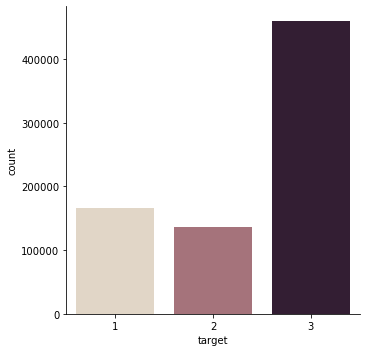

In [4]:
print(round(building_df['target'].value_counts(normalize=True)*100,2))
sns.catplot(x="target", kind="count", palette="ch:.25", data=building_df);

There is some level of class imbalance. 60% of the buildings in the dataset have severe or Grade 3 damage, while about 22% are buildings of Grade 1 with minor damages and 18% of buildings are of Grade 2 or major damages.

## Train Test Split for base line model

In [14]:
X_droplist = ['target','legal_ownership_status', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'damage_grade', 'plan_configuration', 'position']

X = building_df.drop(columns=X_droplist)
y = building_df['target']

#performing train-test split on main dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
print('============================================ ')
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Training set - Features:  (609684, 45) Target:  (609684,)
Test set - Features:  (152422, 45) Target:  (152422,)
3    0.603185
1    0.217613
2    0.179203
Name: target, dtype: float64
3    0.602656
1    0.219188
2    0.178157
Name: target, dtype: float64


In [21]:
lr1 = LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state=100)

lr1.fit(X_train, y_train)

y_pred_test = lr1.predict(X_test)
y_pred_train = lr1.predict(X_train)

# checking accuracy score
print('Test Accuracy score: ', round(metrics.accuracy_score(y_test, y_pred_test),4))
print('Train Accuracy score: ', round(metrics.accuracy_score(y_train, y_pred_train),4))
print('================================')
# checking f1 score
print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4))
print('Train F1 score: ', round(metrics.f1_score(y_train, y_pred_train, average='weighted'),4))
print('================================')
# checking recall score
print('Test Recall score: ', round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4))
print('Train Recall score: ', round(metrics.recall_score(y_train, y_pred_train, average='weighted'),4))

Test Accuracy score:  0.6027
Train Accuracy score:  0.6032
Test F1 score:  0.4532
Train F1 score:  0.4539
Test Recall score:  0.6027
Train Recall score:  0.6032
